Predictive Modeling Example - Source: Analytics Vidya

In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
ID                32561 non-null int64
Age               32561 non-null int64
Workclass         30725 non-null object
Education         32561 non-null object
Marital.Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Hours.Per.Week    32561 non-null int64
Native.Country    31978 non-null object
Income.Group      32561 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


First analyze the data.... Use univariate, multivariate analysis

In [10]:
#univariate analysis
#for numeric data
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [11]:
#for categorical data, get the number of unique values
categorical_var = train.dtypes.loc[train.dtypes=='object'].index

In [12]:
categorical_var

Index([u'Workclass', u'Education', u'Marital.Status', u'Occupation',
       u'Relationship', u'Race', u'Sex', u'Native.Country', u'Income.Group'],
      dtype='object')

In [13]:
type(categorical_var)

pandas.indexes.base.Index

In [15]:
train[categorical_var].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

When the num of unique values is < 10, it is ok, but if it is greater, then combine values and only analyze the aggregated data

In [17]:
#Analyze the value counts and percentages
#train.Race.value_counts()
#in terms of percentages
train.Race.value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

One can observe that top two combined would give ~95%

In [18]:
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [20]:
#Multivariate analysis - There can be 3 combinations of two types of variables (categorical & numeric)
#1)Both categorical - one can use cross tabulation, correlation
ct = pd.crosstab(train.Sex, train['Income.Group'], margins=True)

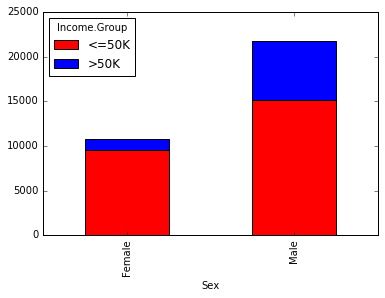

In [23]:
#plot using stacked chart
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

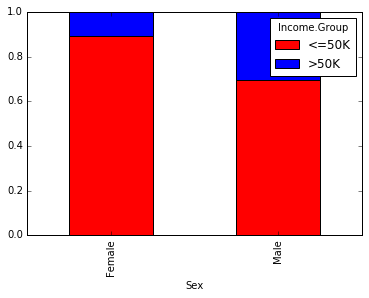

In [25]:
#In terms of percentage
def percConverter(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(percConverter, axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

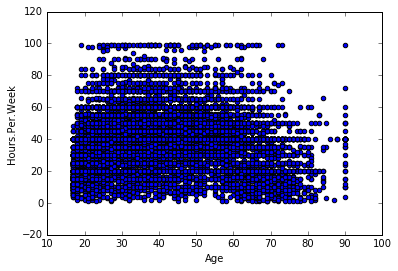

In [27]:
#Now analyze the case of both continuous variables
train.plot('Age','Hours.Per.Week', kind='scatter')

Outliers in numeric variables can be checked by plotting the scatter plot

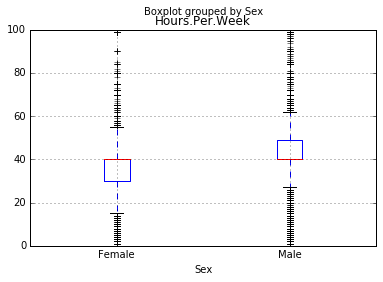

In [28]:
#categorical vs continuous
train.boxplot(column='Hours.Per.Week', by='Sex')

In [30]:
#Check for missing values
train.apply(lambda x:sum(x.isnull()))
#test.apply(lambda x:sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [4]:
#compute mode to impute missing categorical values
from scipy.stats import mode
mode(train['Workclass']).mode[0]

'Private'

In [5]:
var_to_impute = ['Workclass', 'Occupation', 'Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var]).mode[0], inplace=True)
    test[var].fillna(mode(test[var]).mode[0], inplace=True)
train.apply(lambda x:sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [6]:
#Variable transformation
#combine <5%values as other
#first consider an example of occupation
categories_to_combine = ['State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
for cat in categories_to_combine:
    train.Workclass.replace({cat:'Others'}, inplace=True)
    test.Workclass.replace({cat:'Others'}, inplace=True)
train.Workclass.value_counts()

Private             24532
Others               3395
Self-emp-not-inc     2541
Local-gov            2093
Name: Workclass, dtype: int64

In [7]:
#Do it for other categorical varaibles
categorical_variable = list(train.dtypes.loc[train.dtypes=='object'].index)
#remove workclass as it is already transformed
categorical_variable = categorical_variable[1:]
for column in categorical_variable:
    frq = train[column].value_counts()/train.shape[0]
    cat_to_combine = frq.loc[frq.values<0.05].index
    
    for cat in cat_to_combine:
        train[column].replace({cat:'Others'}, inplace=True)
        test[column].replace({cat:'Others'}, inplace=True)
        

In [8]:
#data processing
#converts object data to numerica data by coding
from sklearn.preprocessing import LabelEncoder
categorical_variable = train.dtypes.loc[train.dtypes=='object'].index
#Test data will not have target variable
test_cat_variables = categorical_variable[:-1]
le=LabelEncoder()
for cat in categorical_variable:
    train[cat] = le.fit_transform(train[cat])
for cat in test_cat_variables:
    test[cat] = le.fit_transform(test[cat])
#train.dtypes
test.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
dtype: object

In [9]:
#use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dependent_var = 'Income.Group'
independent_var = [x for x in train.columns if x not in ['ID', 'Income.Group']]

In [10]:
#Intialize the alg
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, max_features='sqrt')
model.fit(train[independent_var], train[dependent_var])

predictions_train = model.predict(train[independent_var])
prediction_test = model.predict(test[independent_var])

#analyze results
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(train[dependent_var], predictions_train)